#Leveraging Machine Learning for Flood Event Forecasting: A Climate Resilience Approach

## Problem Statement
Analyzing the rainfall data to predict flood events using AI and machine learning techniques, focusing on climate risk and disaster management. Using the dataset file rainfall.csv.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/rainfall.csv')
display(df.head())
display(df.info())

,date,rainfall,temperature,humidity,wind_speed,weather_condition
0,2022-01-01,12.5,15.2,78.0,8.5,Rainy
1,2022-01-02,8.2,17.8,65.0,5.2,Rainy
2,2022-01-03,0.0,20.1,52.0,3.1,Sunny
3,2022-01-04,3.7,18.6,71.0,6.7,Rainy
4,2022-01-05,21.1,14.8,82.0,9.3,Rainy


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               54 non-null     object 
 1   rainfall           53 non-null     float64
 2   temperature        53 non-null     float64
 3   humidity           53 non-null     float64
 4   wind_speed         53 non-null     float64
 5   weather_condition  53 non-null     object 
dtypes: float64(4), object(2)
memory usage: 2.7+ KB


None

In [ ]:
# Identify and handle missing values
display("Missing values before handling:")
display(df.isnull().sum())

# A simple approach is to drop rows with missing values for this analysis
df.dropna(inplace=True)

display("Missing values after handling:")
display(df.isnull().sum())

# Convert the 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Explore potential time series features: Create lagged rainfall values
df['rainfall_lag1'] = df['rainfall'].shift(1)
df['rainfall_lag2'] = df['rainfall'].shift(2)

# Analyze the distribution of numerical features
display("Description of numerical features:")
display(df.describe())

# Analyze the unique values of categorical features
display("Unique values of weather_condition:")
display(df['weather_condition'].unique())

display(df.head())

'Missing values before handling:'

,0
date,0
rainfall,1
temperature,1
humidity,1
wind_speed,1
weather_condition,1


'Missing values after handling:'

,0
date,0
rainfall,0
temperature,0
humidity,0
wind_speed,0
weather_condition,0


'Description of numerical features:'

,date,rainfall,temperature,humidity,wind_speed,rainfall_lag1,rainfall_lag2
count,53,53.000000,53.000000,53.000000,53.000000,52.000000,51.000000
mean,2022-01-27 00:00:00,9.049057,17.950943,69.245283,6.403774,9.080769,9.258824
min,2022-01-01 00:00:00,0.000000,13.900000,44.000000,2.100000,0.000000,0.000000
25%,2022-01-14 00:00:00,3.900000,16.100000,62.000000,4.700000,3.850000,4.100000
50%,2022-01-27 00:00:00,8.300000,17.800000,72.000000,6.700000,8.700000,9.100000
75%,2022-02-09 00:00:00,14.800000,19.400000,78.000000,8.300000,14.825000,14.850000
max,2022-02-22 00:00:00,21.800000,23.400000,89.000000,10.500000,21.800000,21.800000
std,NaN,6.712521,2.500663,11.969361,2.209069,6.774000,6.717386


'Unique values of weather_condition:'

array(['Rainy', 'Sunny'], dtype=object)

,date,rainfall,temperature,humidity,wind_speed,weather_condition,rainfall_lag1,rainfall_lag2
0,2022-01-01,12.5,15.2,78.0,8.5,Rainy,NaN,NaN
1,2022-01-02,8.2,17.8,65.0,5.2,Rainy,12.5,NaN
2,2022-01-03,0.0,20.1,52.0,3.1,Sunny,8.2,12.5
3,2022-01-04,3.7,18.6,71.0,6.7,Rainy,0.0,8.2
4,2022-01-05,21.1,14.8,82.0,9.3,Rainy,3.7,0.0


In [ ]:
# Analyze the distribution of rainfall
display("Rainfall distribution:")
display(df['rainfall'].describe())
display("Rainfall quantiles:")
display(df['rainfall'].quantile([0.5, 0.75, 0.9, 0.95, 0.99]))

# Based on the distribution, let's set a threshold.
# For example, let's consider rainfall above the 90th percentile as a potential flood event.
# You can adjust this threshold based on domain knowledge or further analysis.
rainfall_threshold = df['rainfall'].quantile(0.90)
display(f"Rainfall threshold for potential flood event: {rainfall_threshold:.2f}")

# Create the 'flood_event' binary column
df['flood_event'] = (df['rainfall'] > rainfall_threshold).astype(int)

# Display the count of flood events
display("Count of flood events:")
display(df['flood_event'].value_counts())

'Rainfall distribution:'

,rainfall
count,53.000000
mean,9.049057
std,6.712521
min,0.000000
25%,3.900000
50%,8.300000
75%,14.800000
max,21.800000


'Rainfall quantiles:'

,rainfall
0.50,8.300
0.75,14.800
0.90,18.560
0.95,19.960
0.99,21.436


'Rainfall threshold for potential flood event: 18.56'

'Count of flood events:'

,count
flood_event,
0,47
1,6


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Select features (X) and target variable (y)
features = ['rainfall', 'temperature', 'humidity', 'wind_speed', 'rainfall_lag1', 'rainfall_lag2']
X = df[features]
y = df['flood_event']

# Handle missing values created by lagging (drop rows)
X.dropna(inplace=True)
y = y[X.index] # Align y with the cleaned X

# Split data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Choose and train a classification model (Random Forest with class weight to handle imbalance)
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

display("Model training complete.")

/tmp/ipython-input-1825929492.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


'Model training complete.'

### Visualize the data

Visualize the distribution of key features and the relationship between rainfall and flood events. Visualize the distribution of rainfall, temperature, humidity, and wind speed, and create a scatter plot to show the relationship between rainfall and the flood event.

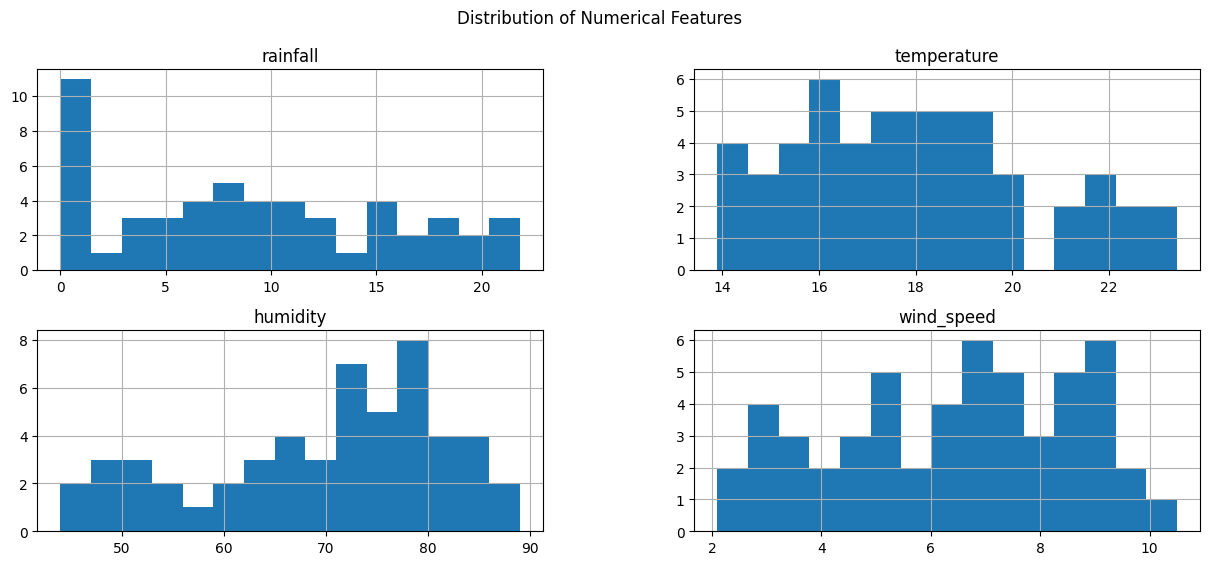

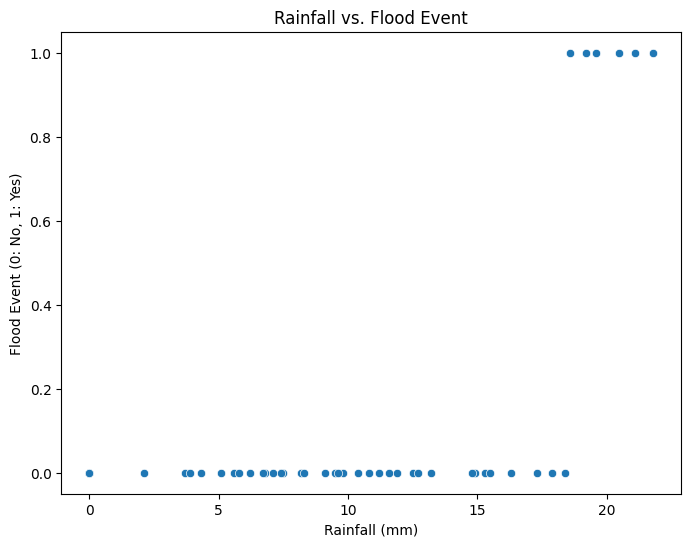

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of numerical features
numerical_features = ['rainfall', 'temperature', 'humidity', 'wind_speed']
df[numerical_features].hist(bins=15, figsize=(15, 6), layout=(2, 2))
plt.suptitle("Distribution of Numerical Features")
plt.show()

# Visualize the relationship between rainfall and flood events
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rainfall', y='flood_event', data=df)
plt.title("Rainfall vs. Flood Event")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Flood Event (0: No, 1: Yes)")
plt.show()